<a href="https://colab.research.google.com/github/aneeshmurali-n/ML_Bangalore_House_Price_Analysis/blob/main/ML_Bangalore_House_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Upload Dataset

In [1]:

import google.colab.files as files
uploaded_file = files.upload()

Saving house_price.csv to house_price.csv


## Import Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew, kurtosis

## Define functions

In [3]:
# Define a function to Find each feature's unique values and length.
def unique_values(df):
    for column in df.columns:
        print(f"Unique Values in feature '{column}' :\n {df[column].unique()}\n Length : {df[column].nunique()}\n\n")


# Function to get outliers using various methods and filter out outliers or trim
def get_outliers(df,column, method='mean_std', lower_percentile=1, upper_percentile=99, threshold=3,filter=False):

    # Check if the column exists in the DataFrame
    if column not in df.columns:
        raise ValueError(f"Column '{column}' is not in DataFrame and the DataFrame columns are :{df.columns}")

    # Mean and Standard deviation method
    if method == 'mean_std':
        mean = df[column].mean()
        std = df[column].std()
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
        outliers_mask = (df[column] < lower_bound) | (df[column] > upper_bound)

    # Percentile method
    elif method == 'percentile':
        lower_bound = np.percentile(df[column], lower_percentile)
        upper_bound = np.percentile(df[column], upper_percentile)
        outliers_mask = (df[column] < lower_bound) | (df[column] > upper_bound)

    # IQR(Inter quartile range method)
    elif method == 'IQR':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_mask =  (df[column] < lower_bound) | (df[column] > upper_bound)

    # Z Score method
    elif method == 'zscore':
        z_scores = zscore(df[column])
        outliers_mask = (z_scores < (-1 * threshold) ) | (z_scores > threshold)


    if filter:                    # if the filter is true
        return df[~outliers_mask] # return outlier filtered dataframe
    else:                         # if the filter is false
        return df[outliers_mask]  # return dataframe of outliers



# simple box ploter from list or string of dataframe column names
def box_plot(df, data):
    if type(data) == list:
        fig, axs = plt.subplots(len(data), figsize=(12, 12))
        for i, column in enumerate(data):
            sns.boxplot(x=df[column], ax=axs[i])
        plt.tight_layout()
        plt.show()
    elif type(data) == str:
            sns.boxplot(x=df[data])
            plt.show()

##Perform basic EDA

In [4]:
df = pd.read_csv('house_price.csv')
df # show df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [5]:
df.info() # show df info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [6]:
unique_values(df) # show each feature's unique values and length.

Unique Values in feature 'location' :
 ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli'
 'Lingadheeranahalli' 'Kothanur' 'Whitefield' 'Old Airport Road'
 'Rajaji Nagar' 'Marathahalli' 'other' '7th Phase JP Nagar' 'Gottigere'
 'Sarjapur' 'Mysore Road' 'Bisuvanahalli' 'Raja Rajeshwari Nagar'
 'Kengeri' 'Binny Pete' 'Thanisandra' 'Bellandur' 'Electronic City'
 'Ramagondanahalli' 'Yelahanka' 'Hebbal' 'Kasturi Nagar' 'Kanakpura Road'
 'Electronics City Phase 1' 'Kundalahalli' 'Chikkalasandra'
 'Murugeshpalya' 'Sarjapur  Road' 'HSR Layout' 'Doddathoguru' 'KR Puram'
 'Bhoganhalli' 'Lakshminarayana Pura' 'Begur Road' 'Varthur'
 'Bommanahalli' 'Gunjur' 'Devarachikkanahalli' 'Hegde Nagar'
 'Haralur Road' 'Hennur Road' 'Kothannur' 'Kalena Agrahara'
 'Kaval Byrasandra' 'ISRO Layout' 'Garudachar Palya' 'EPIP Zone'
 'Dasanapura' 'Kasavanhalli' 'Sanjay nagar' 'Domlur'
 'Sarjapura - Attibele Road' 'Yeshwanthpur' 'Chandapura' 'Nagarbhavi'
 'Devanahalli' 'Ramamurthy Nagar' 'Malleshwaram' 'Ak

In [7]:
# Check None value counts
print(df.isnull().sum())

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [8]:
df.describe() # show df statistics summary

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


## Summary of df
location: Property location (categorical).<br>
size: Property size in "BHK" (categorical).<br>
total_sqft: Property area in sqft (numerical).<br>
bath: Number of bathrooms (numerical).<br>
price: Property Price (numerical).<br>
bhk: Number of bedrooms (numerical, size column is the categorical represention of bhk numerical column).<br>
price_per_sqft: Price per square foot (numerical).<br>
dataset size : 13200 rows × 7 columns
and no none values are found.

## Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median

#### a) Mean and Standard deviation method

In [9]:
 # detect outliers of  'total_sqft', 'price_per_sqft' with mean std method
total_sqft_outliers = get_outliers(df,'total_sqft', method='mean_std')
price_per_sqft_outliers = get_outliers(df,'price_per_sqft', method='mean_std')

In [10]:
total_sqft_outliers # show total_sqft_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
61,Whitefield,4 Bedroom,5700.0,5.0,650.0,4,11403
120,Hebbal,4 BHK,5611.5,4.0,477.0,4,8500
404,Rajaji Nagar,7 BHK,12000.0,6.0,2200.0,7,18333
435,Whitefield,4 Bedroom,11890.0,4.0,700.0,4,5887
509,Banashankari Stage III,4 Bedroom,8500.0,4.0,145.0,4,1705
...,...,...,...,...,...,...,...
12976,other,4 BHK,6652.0,6.0,660.0,4,9921
13000,other,4 Bedroom,6688.0,6.0,700.0,4,10466
13078,other,4 Bedroom,9200.0,4.0,2600.0,4,28260
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000


In [11]:
price_per_sqft_outliers # show price_per_sqft_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [12]:
# Trim and remove outliers using mean_std method on 'total_sqft' and 'price_per_sqft' columns
mean_std_trim_df = get_outliers(df,'total_sqft', method='mean_std', filter=True)                 # trim based on 'total_sqft' column
print(mean_std_trim_df.shape) # check shape
mean_std_trim_df = get_outliers(mean_std_trim_df,'price_per_sqft', method='mean_std', filter=True) # then trim based on 'price_per_sqft'
print(mean_std_trim_df.shape) # check shape

(13083, 7)
(13078, 7)


####b) Percentile method

In [13]:
 # detect outliers of  'total_sqft', 'price_per_sqft' with Percentile method
total_sqft_outliers = get_outliers(df,'total_sqft', method='percentile')
price_per_sqft_outliers = get_outliers(df,'price_per_sqft', method='percentile')

In [14]:
total_sqft_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
61,Whitefield,4 Bedroom,5700.0,5.0,650.0,4,11403
77,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782
117,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333
120,Hebbal,4 BHK,5611.5,4.0,477.0,4,8500
169,Attibele,1 BHK,450.0,1.0,11.0,1,2444
...,...,...,...,...,...,...,...
13000,other,4 Bedroom,6688.0,6.0,700.0,4,10466
13078,other,4 Bedroom,9200.0,4.0,2600.0,4,28260
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13097,other,1 BHK,250.0,2.0,40.0,1,16000


In [15]:
price_per_sqft_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
130,Electronic City,2 BHK,880.0,1.0,16.5,2,1875
169,Attibele,1 BHK,450.0,1.0,11.0,1,2444
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [16]:
# Trim and remove outliers using percentile method on 'total_sqft' and 'price_per_sqft' columns
percentile_trim_df = get_outliers(df,'total_sqft', method='percentile', filter=True)                 # trim based on 'total_sqft' column
print(percentile_trim_df.shape) # check shape
percentile_trim_df = get_outliers(percentile_trim_df,'price_per_sqft', method='percentile', filter=True) # then trim based on 'price_per_sqft'
print(percentile_trim_df.shape) # check shape

(12954, 7)
(12709, 7)


####c) IQR(Inter quartile range method)

In [17]:
 # detect outliers of  'total_sqft', 'price_per_sqft' with IQR(Inter quartile range method)
total_sqft_outliers = get_outliers(df,'total_sqft', method='IQR')
price_per_sqft_outliers = get_outliers(df,'price_per_sqft', method='IQR')

In [18]:
total_sqft_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.0,4,4615
6,Old Airport Road,4 BHK,2732.0,4.0,204.0,4,7467
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
11,Whitefield,4 Bedroom,2785.0,5.0,295.0,4,10592
18,other,3 BHK,2770.0,4.0,290.0,3,10469
...,...,...,...,...,...,...,...
13170,Sarjapur Road,4 BHK,4050.0,2.0,450.0,4,11111
13179,Whitefield,4 BHK,2856.0,5.0,154.5,4,5409
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111


In [19]:
price_per_sqft_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [20]:
# Trim and remove outliers using IQR(Inter quartile range method) on 'total_sqft' and 'price_per_sqft' columns
IQR_trim_df = get_outliers(df,'total_sqft', method='IQR', filter=True)                 # trim based on 'total_sqft' column
print(IQR_trim_df.shape) # check shape
IQR_trim_df = get_outliers(IQR_trim_df,'price_per_sqft', method='IQR', filter=True) # then trim based on 'price_per_sqft'
print(IQR_trim_df.shape) # check shape

(12051, 7)
(10913, 7)


####d) Z Score method

In [21]:
 # detect outliers of  'total_sqft', 'price_per_sqft' with z score method
total_sqft_outliers = get_outliers(df,'total_sqft', method='zscore')
price_per_sqft_outliers = get_outliers(df,'price_per_sqft', method='zscore')

In [22]:
total_sqft_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
61,Whitefield,4 Bedroom,5700.0,5.0,650.0,4,11403
120,Hebbal,4 BHK,5611.5,4.0,477.0,4,8500
404,Rajaji Nagar,7 BHK,12000.0,6.0,2200.0,7,18333
435,Whitefield,4 Bedroom,11890.0,4.0,700.0,4,5887
509,Banashankari Stage III,4 Bedroom,8500.0,4.0,145.0,4,1705
...,...,...,...,...,...,...,...
12976,other,4 BHK,6652.0,6.0,660.0,4,9921
13000,other,4 Bedroom,6688.0,6.0,700.0,4,10466
13078,other,4 Bedroom,9200.0,4.0,2600.0,4,28260
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000


In [23]:
price_per_sqft_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [24]:
# Trim and remove outliers using Z Score method on 'total_sqft' and 'price_per_sqft' columns
zscore_trim_df = get_outliers(df,'total_sqft', method='zscore', filter=True)                 # trim based on 'total_sqft' column
print(zscore_trim_df.shape) # check shape
zscore_trim_df = get_outliers(zscore_trim_df,'price_per_sqft', method='zscore', filter=True) # then trim based on 'price_per_sqft'
print(zscore_trim_df.shape) # check shape

(13083, 7)
(13078, 7)


##Create a box plot and use this to determine which method seems to work best to remove outliers for this data?

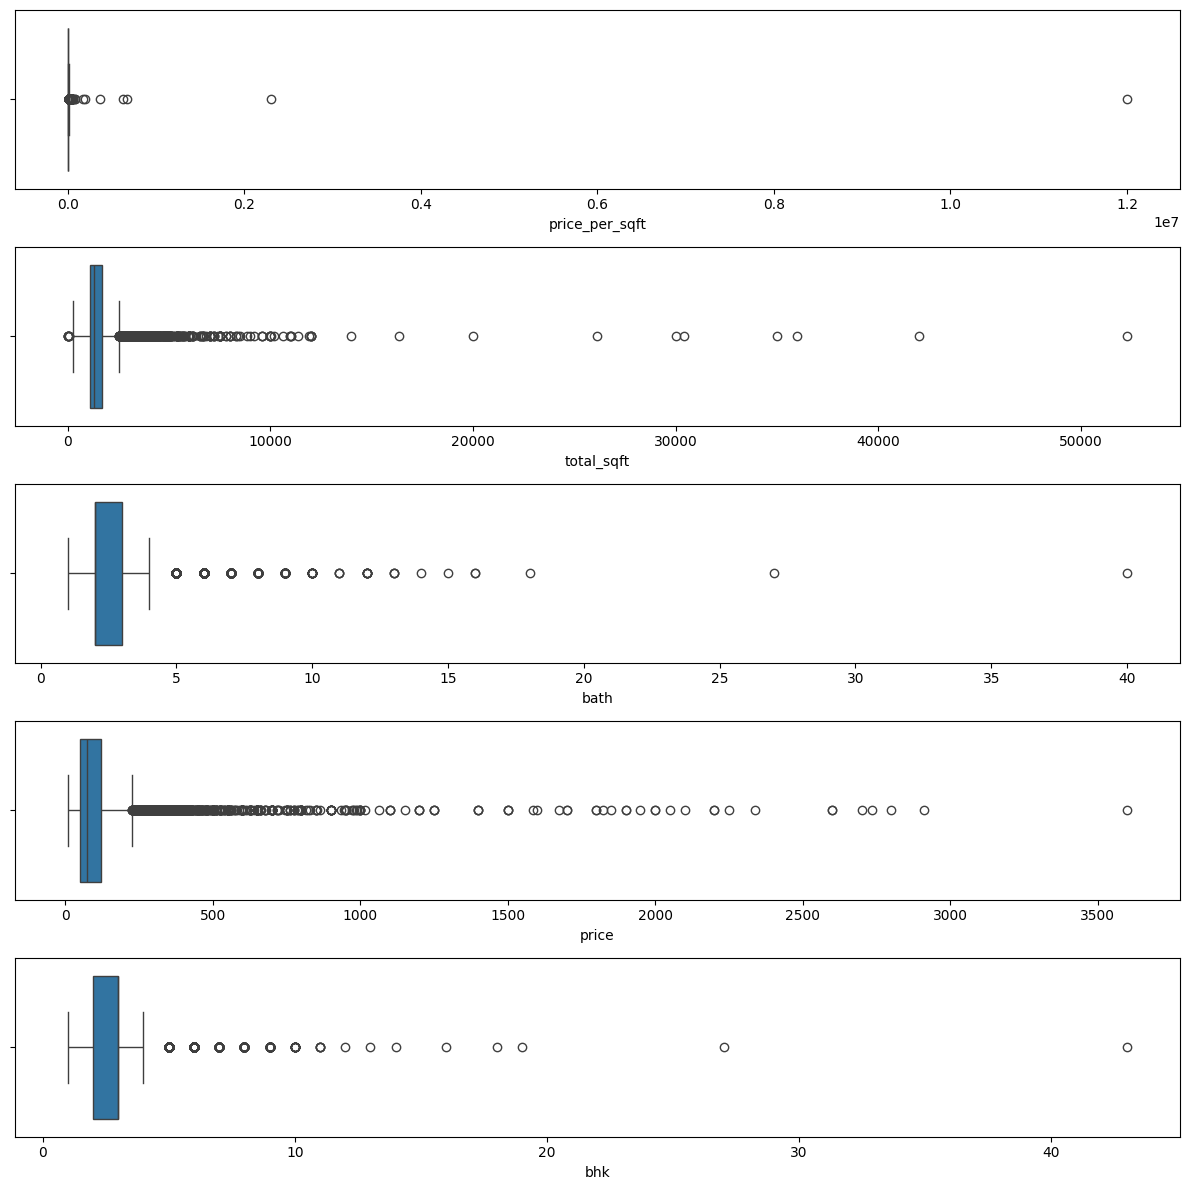

In [25]:
# box plot of all numerical data without removing outliers
box_plot(df,['price_per_sqft', 'total_sqft', 'bath', 'price', 'bhk']) # show box plot of all numerical columns

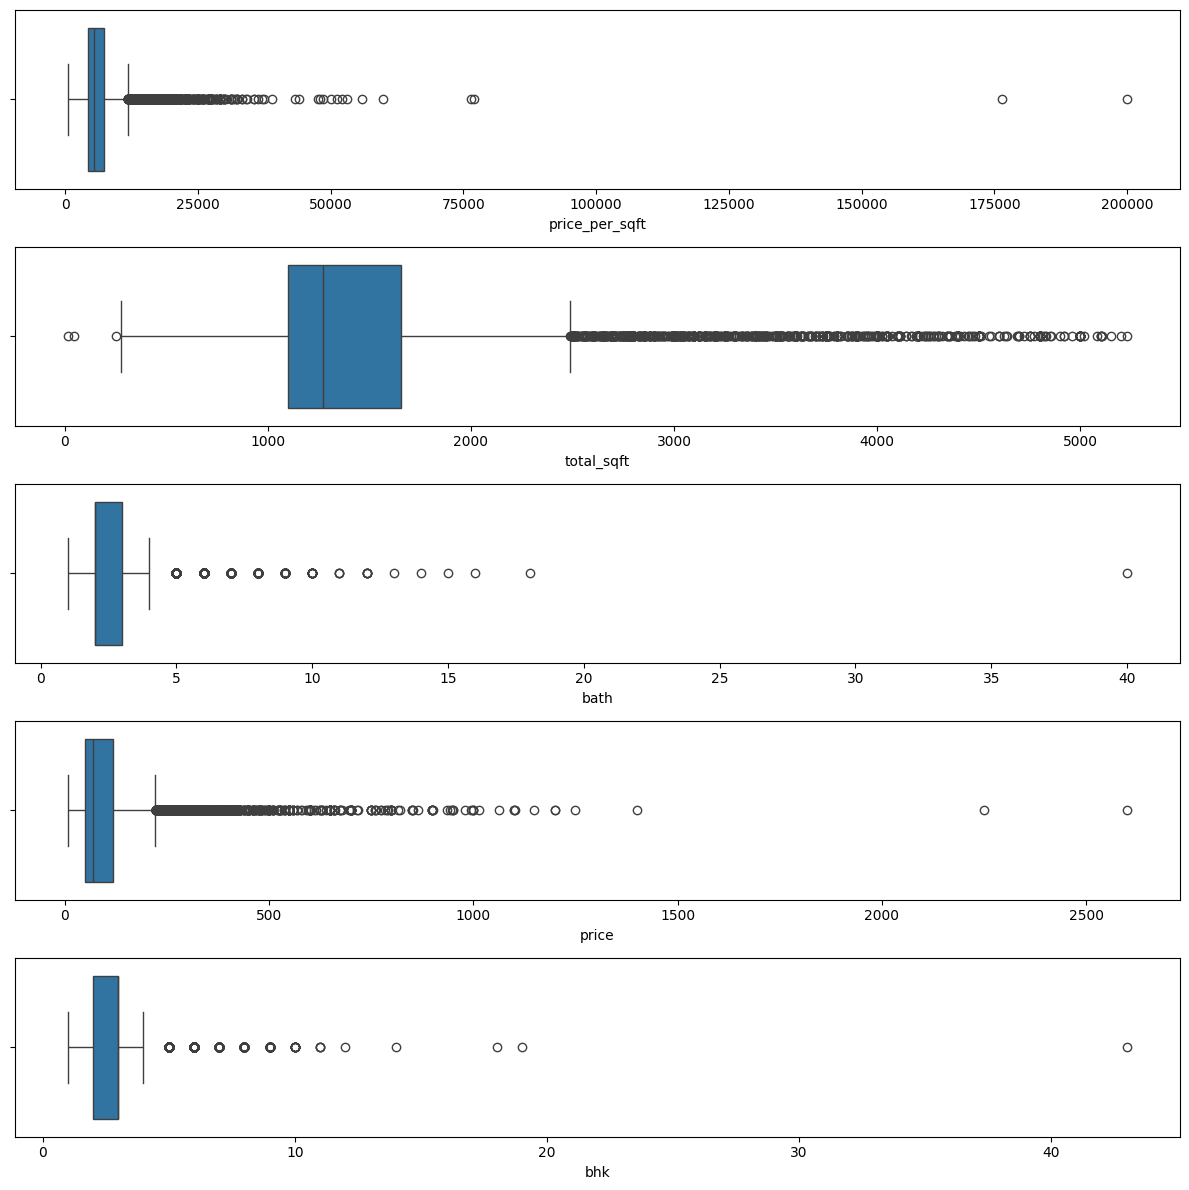

In [26]:
# box plot of all numerical data with removing outliers based on 'price_per_sqft', 'total_sqft' columns and outlier detection using Mean and Standard deviation method
box_plot(mean_std_trim_df,['price_per_sqft', 'total_sqft', 'bath', 'price', 'bhk']) # show box plot of mean_std_trim_df

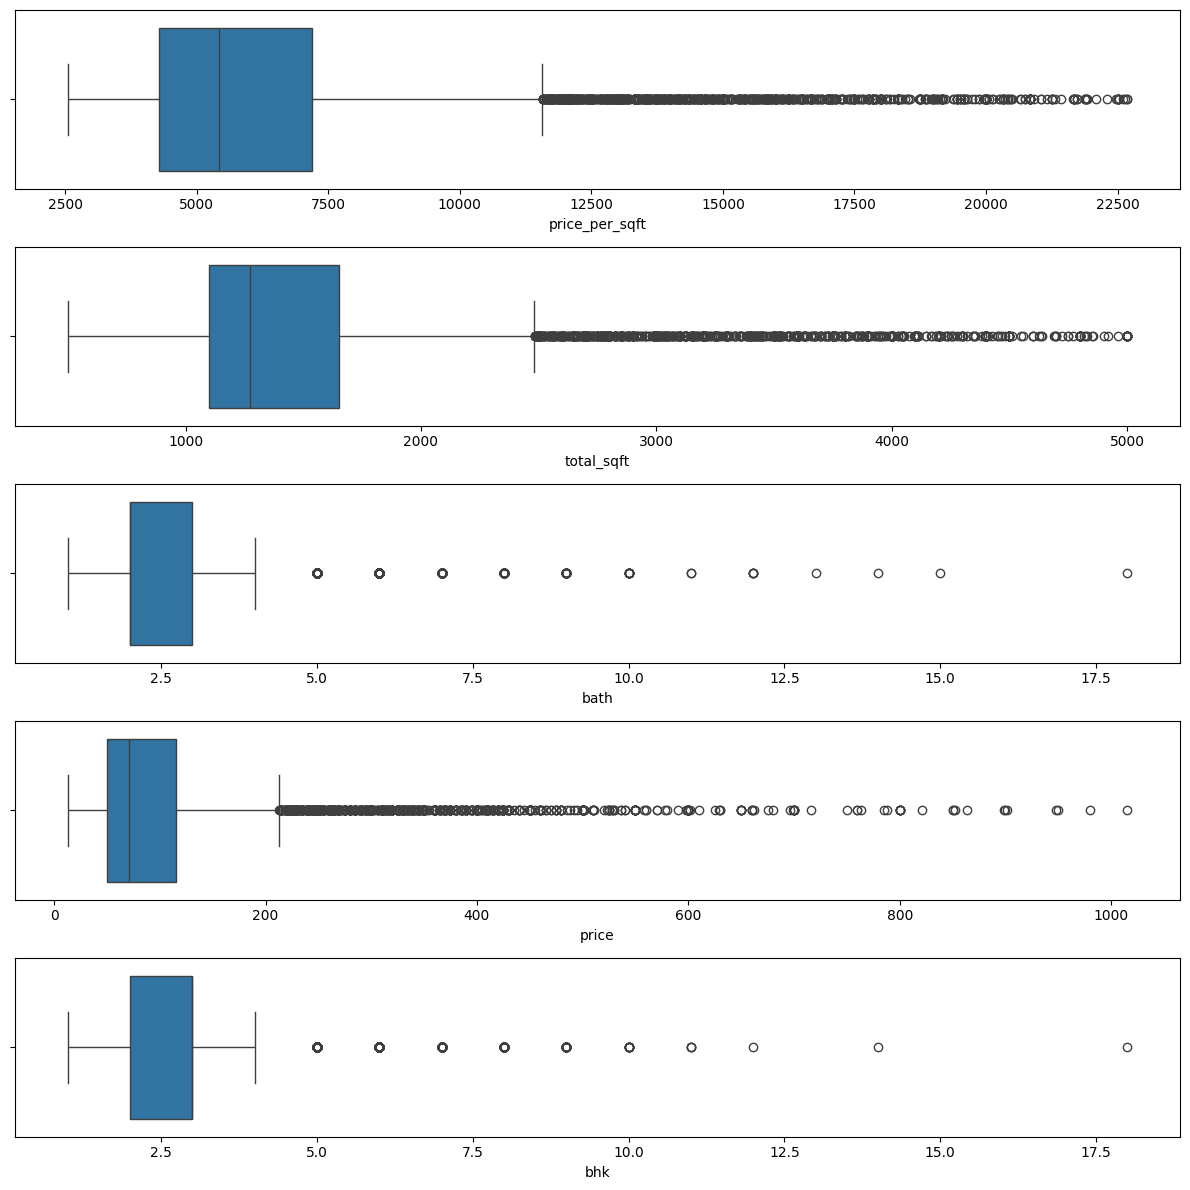

In [27]:
# box plot of all numerical data with removing outliers based on 'price_per_sqft', 'total_sqft' columns and outlier detection using the percentile method
box_plot(percentile_trim_df,['price_per_sqft', 'total_sqft', 'bath', 'price', 'bhk']) # show box plot of percentile_trim_df

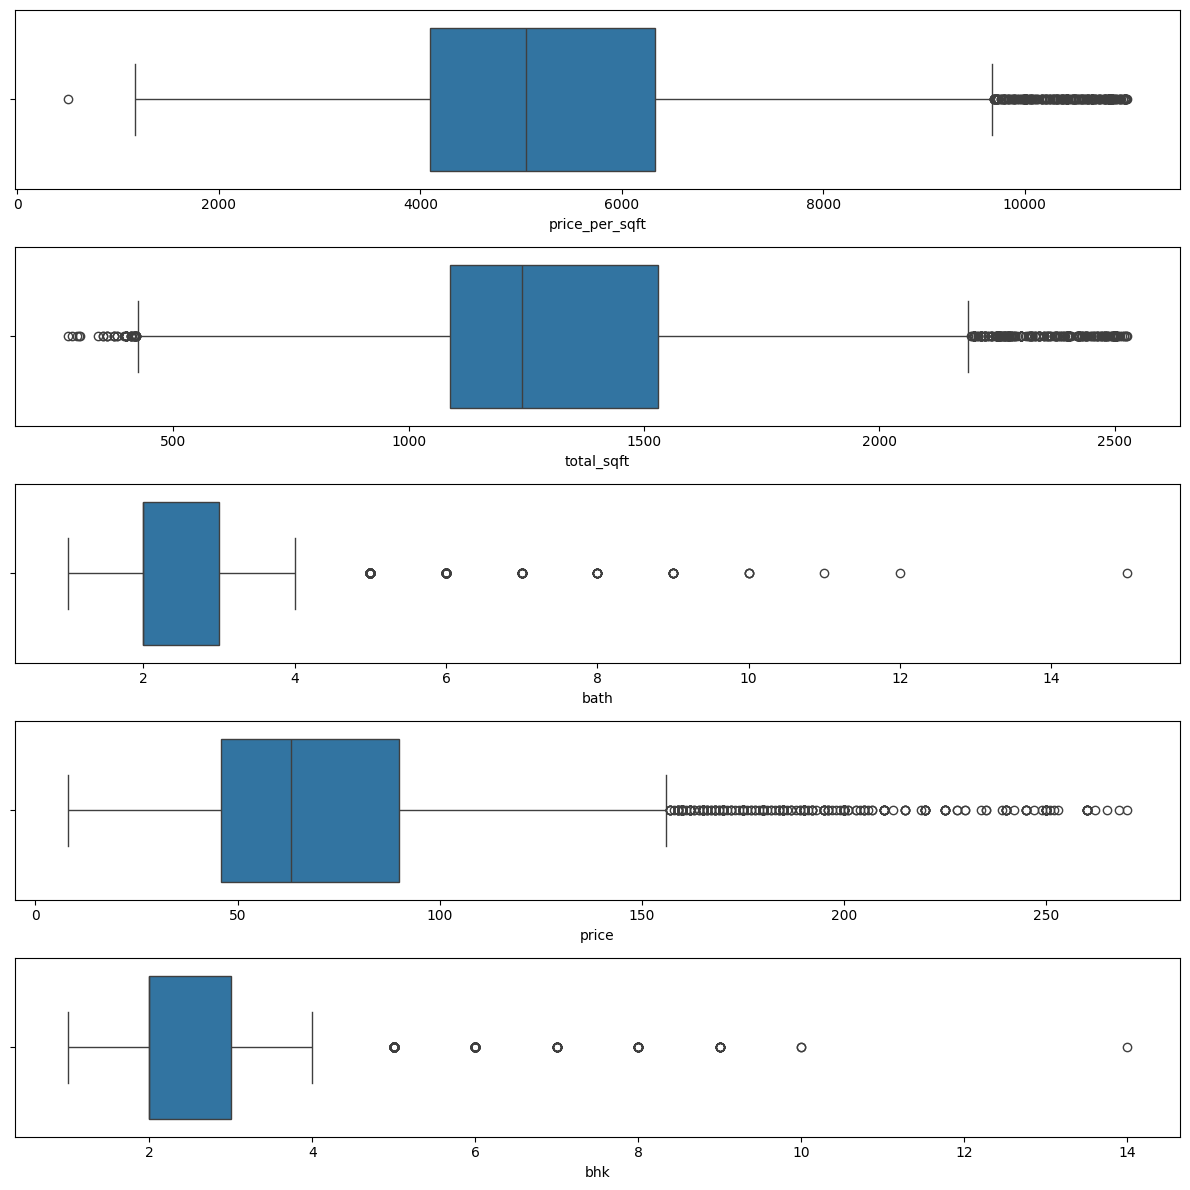

In [28]:
# box plot of all numerical data with removing outliers based on 'price_per_sqft', 'total_sqft' columns and outlier detection using the IQR method
box_plot(IQR_trim_df,['price_per_sqft', 'total_sqft', 'bath', 'price', 'bhk']) # show box plot of IQR_trim_df

##Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation.

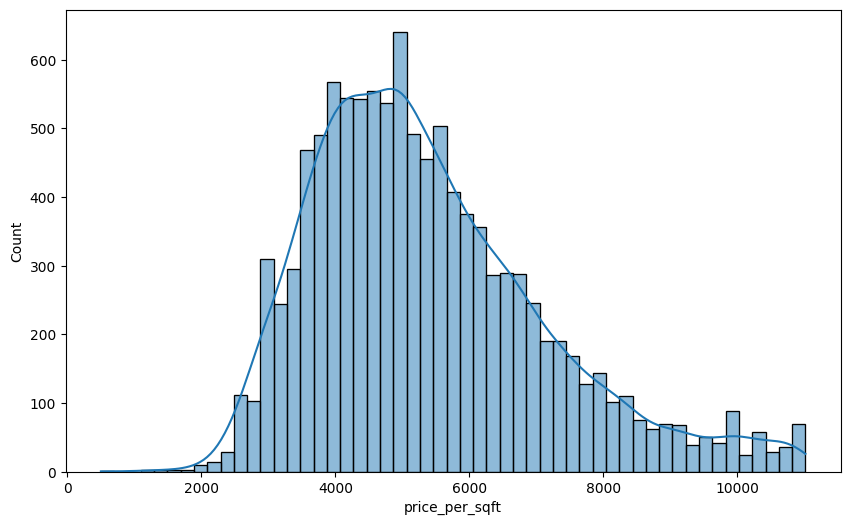

In [29]:
# histplot of price_per_sqft after trimming outliers
plt.figure(figsize=(10, 6))
sns.histplot(IQR_trim_df.price_per_sqft, kde=True)
plt.show()

####Skewness and kurtosis before transform
Skewness and kurtosis are two statistical measures that describe the shape of a probability distribution. They are often used to characterize how data points are distributed around the mean.<br>
Skewness:<br>
Skewness measures the asymmetry of the distribution. A positive value indicates a right-skewed distribution (tail on the right), a negative value indicates a left-skewed distribution (tail on the left), and a value of 0 indicates a symmetrical distribution.<br>
Kurtosis:<br>
Kurtosis measures the "tailedness" of the distribution. A value of 3 indicates a normal distribution, a value greater than 3 indicates a leptokurtic distribution (heavy tails), and a value less than 3 indicates a platykurtic distribution (light tails).<br>

In [30]:
print(f"Skewness before transformation: {skew(IQR_trim_df.price_per_sqft)}")
print(f"Kurtosis before transformation: {kurtosis(IQR_trim_df.price_per_sqft)}")

Skewness before transformation: 0.8746321739700826
Kurtosis before transformation: 0.5991555593109092


####perform transformations

In [31]:
#logarithmic transformation
log_transformed_price_per_sqft_df = IQR_trim_df.copy() # create a copy of IQR_trim_df
log_transformed_price_per_sqft_df.price_per_sqft = np.log(IQR_trim_df.price_per_sqft) # perform logarithmic transformation on price_per_sqft column
log_transformed_price_per_sqft_df # show log_transformed_price_per_sqft_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,8.215818
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,8.367532
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,8.739536
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,8.354674
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,8.085487
...,...,...,...,...,...,...,...
13192,Bellandur,2 BHK,1262.0,2.0,47.00,2,8.222554
13193,Uttarahalli,3 BHK,1345.0,2.0,57.00,3,8.351611
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,8.784162
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,8.567506


####Skewness and kurtosis after the transformation.

In [32]:
print(f"Skewness after transformation: {skew(log_transformed_price_per_sqft_df.price_per_sqft)}")
print(f"Kurtosis after transformation: {kurtosis(log_transformed_price_per_sqft_df.price_per_sqft)}")

Skewness after transformation: 0.012722861264790412
Kurtosis after transformation: 0.09649026585186737


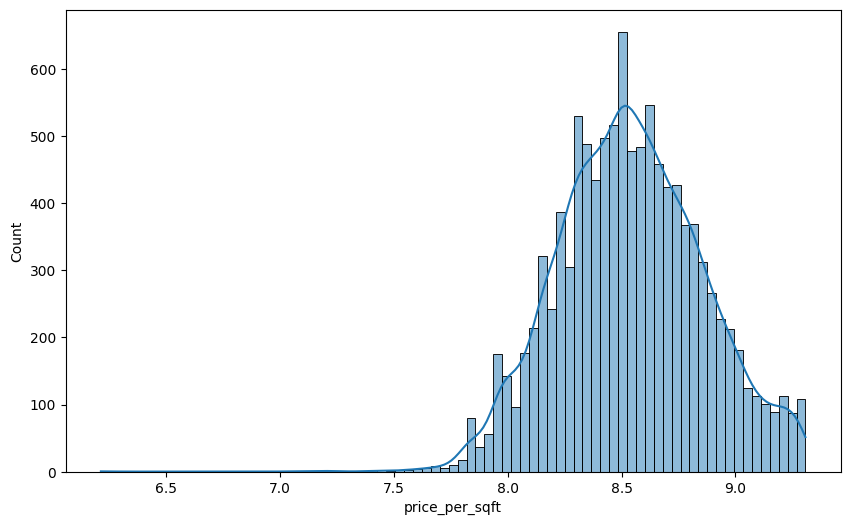

In [33]:
# histplot of price_per_sqft after the logarithmic transformation
plt.figure(figsize=(10, 6))
sns.histplot(log_transformed_price_per_sqft_df.price_per_sqft, kde=True)
plt.show()

##Check the correlation between all the numerical columns and plot heatmap.

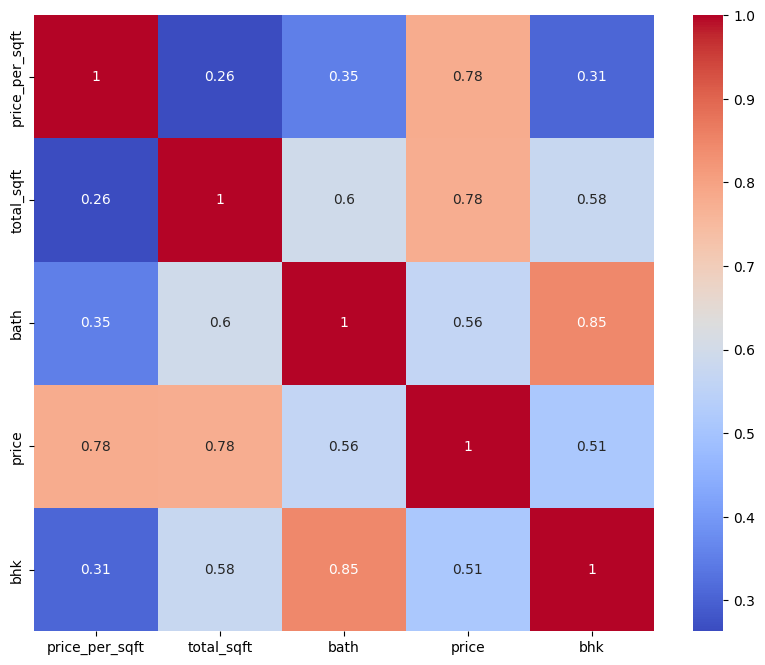

In [34]:
correlation = IQR_trim_df[['price_per_sqft', 'total_sqft', 'bath', 'price', 'bhk']].corr() # calculate correlation between numerical columns
correlation # show correlation
plt.figure(figsize=(10, 8)) # set figure size
sns.heatmap(correlation, annot=True, cmap='coolwarm') # plot heatmap
plt.show() # show

*   The heat map above shows a strong +ve correlation of 78% between total sqft and price, indicating that larger sqft properties are more expensive.  
*   Very strong +ve correlation of 85% between bhk and bathrooms (bath). we have to take only one of them to avoid multicollinearity for training the ML model
*   Strong +ve correlation of 78% between price per sqft and price.




##Draw Scatter plot between the variables to check the correlation between them.

Figure 1: price_per_sqft Vs total_sqft



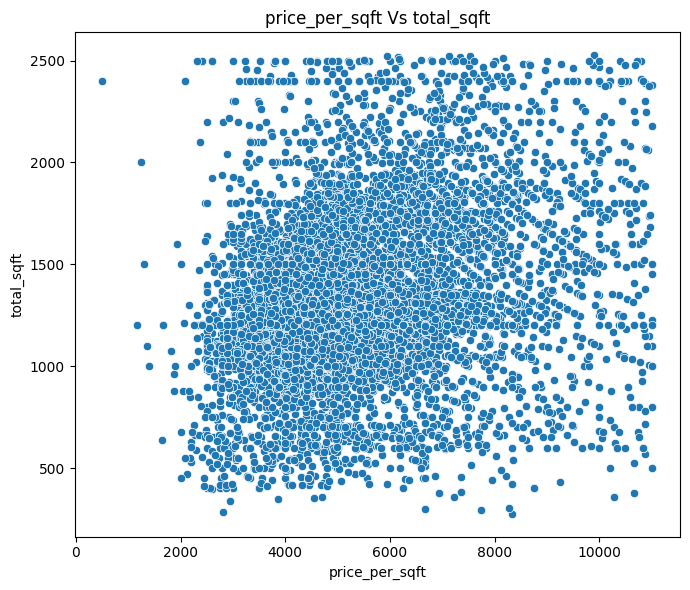





Figure 2: price_per_sqft Vs bath



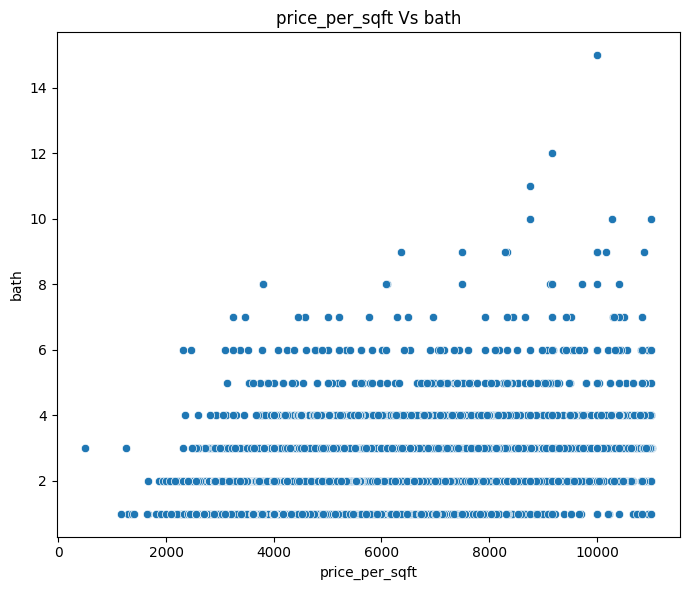





Figure 3: price_per_sqft Vs price



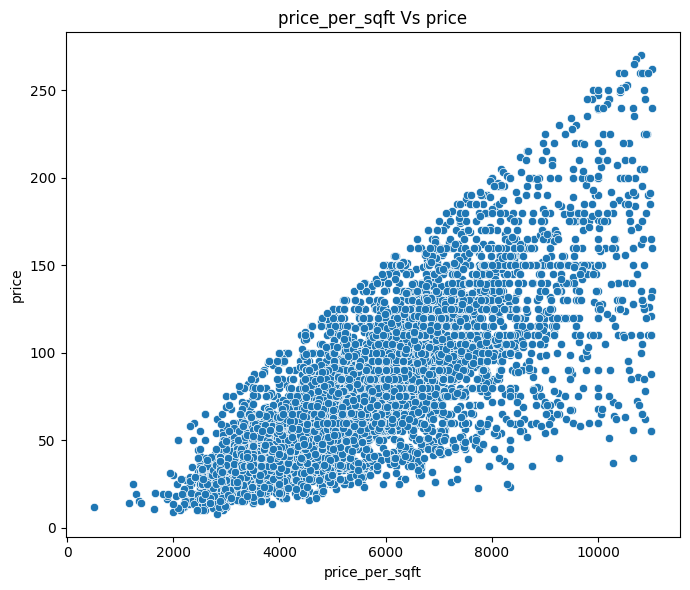





Figure 4: price_per_sqft Vs bhk



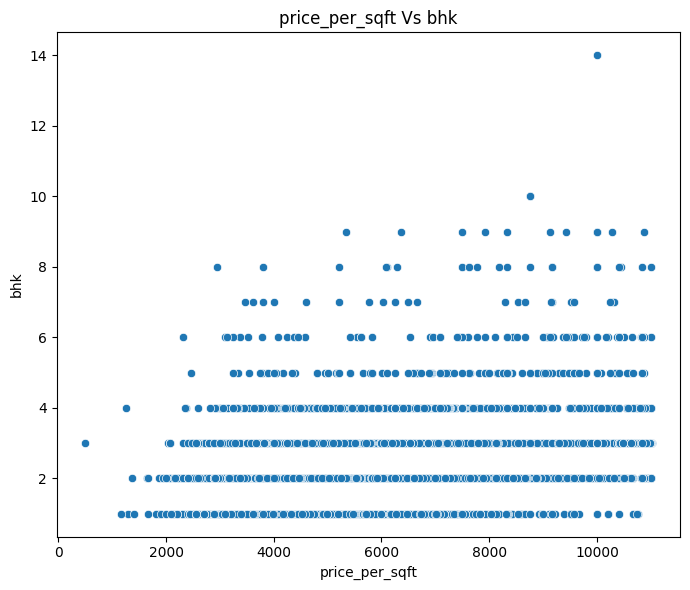





Figure 5: total_sqft Vs price_per_sqft



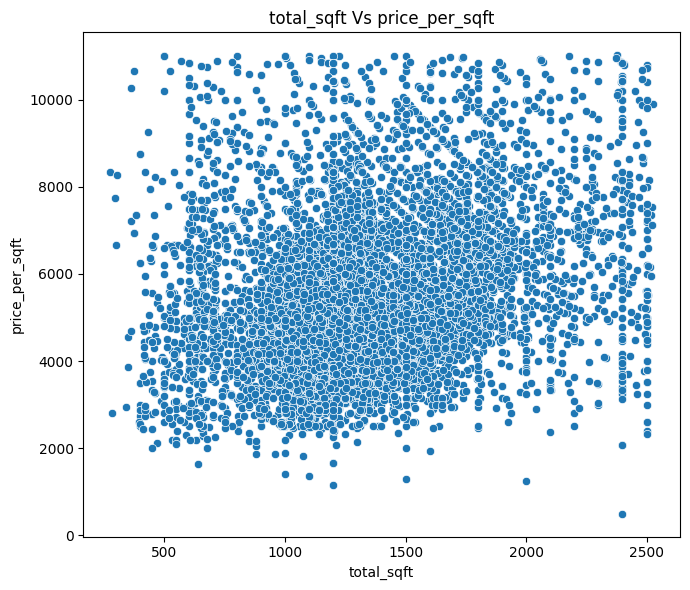





Figure 6: total_sqft Vs bath



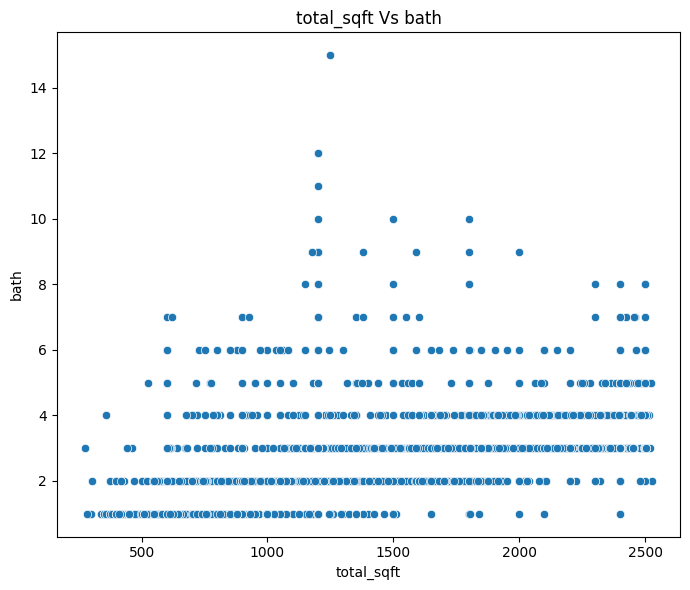





Figure 7: total_sqft Vs price



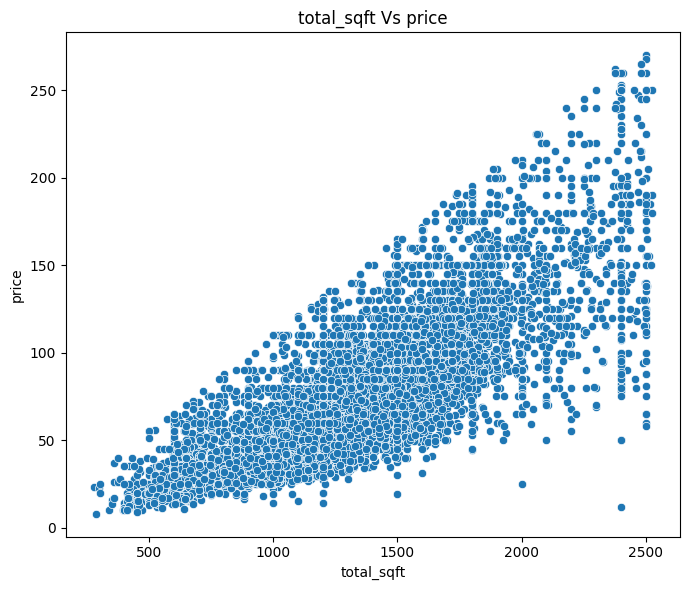





Figure 8: total_sqft Vs bhk



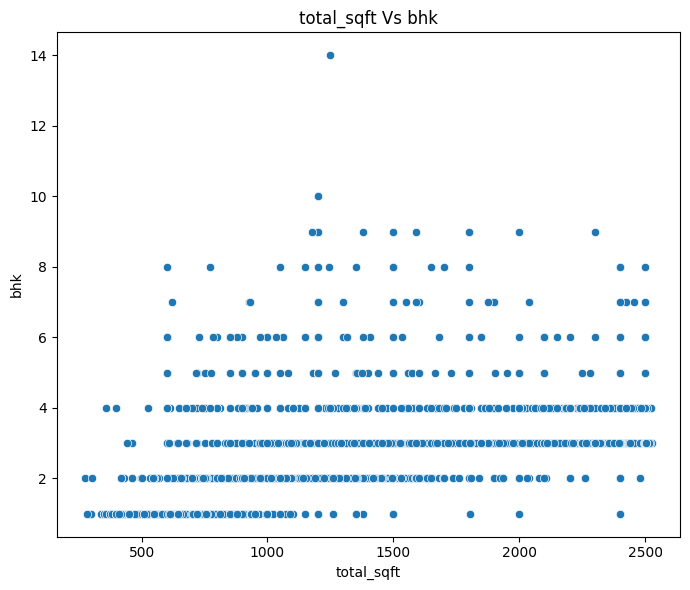





Figure 9: bath Vs price_per_sqft



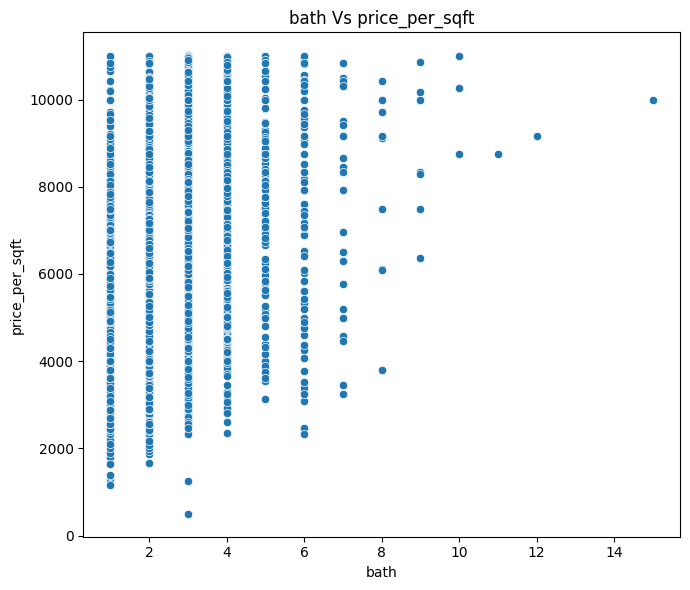





Figure 10: bath Vs total_sqft



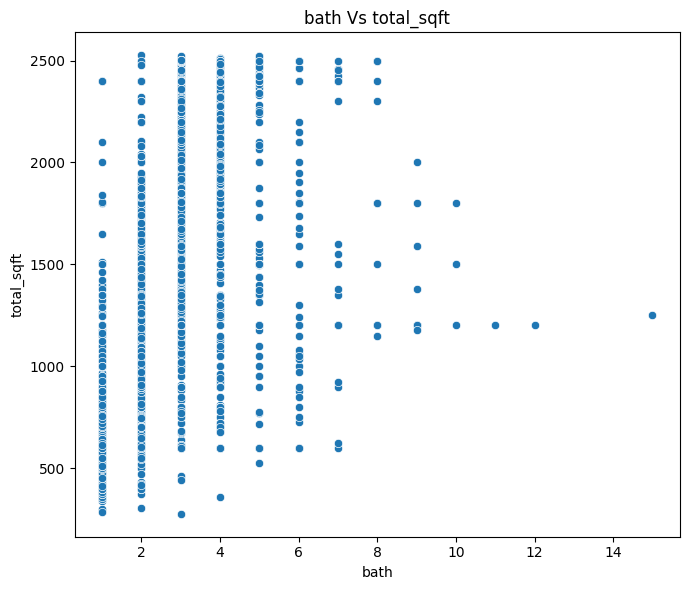





Figure 11: bath Vs price



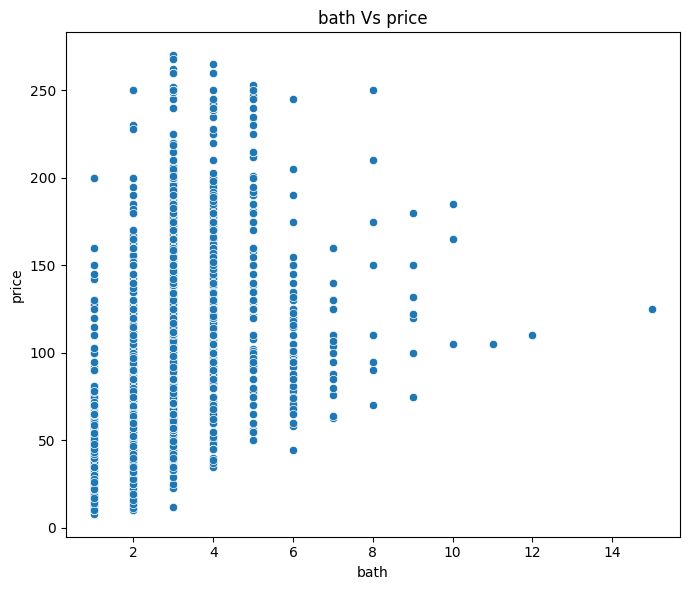





Figure 12: bath Vs bhk



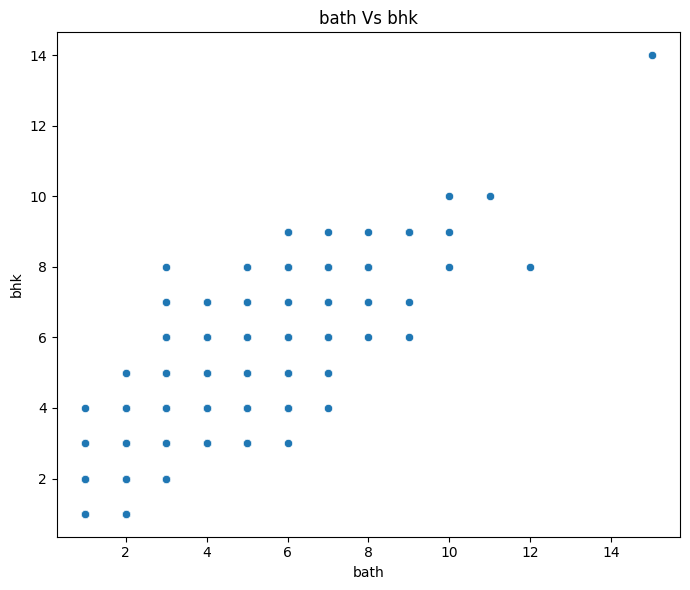





Figure 13: price Vs price_per_sqft



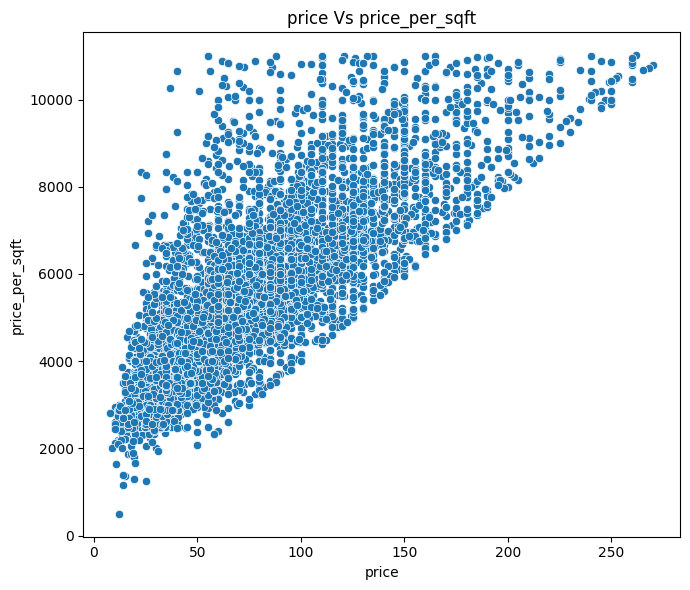





Figure 14: price Vs total_sqft



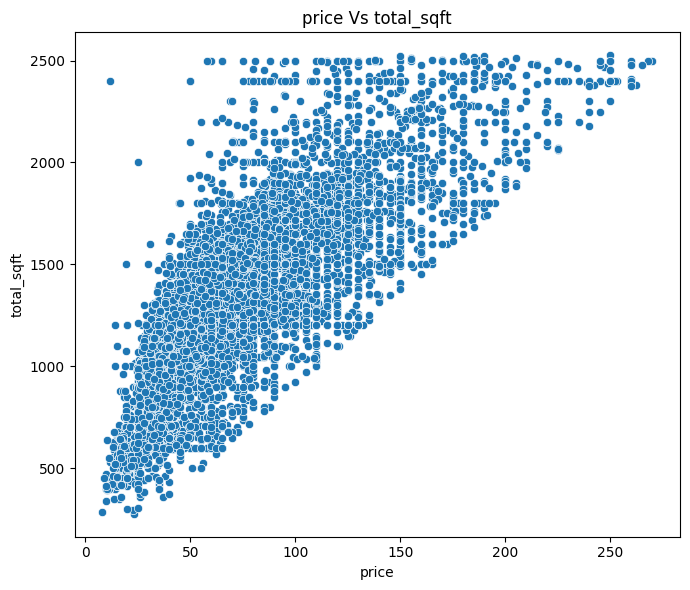





Figure 15: price Vs bath



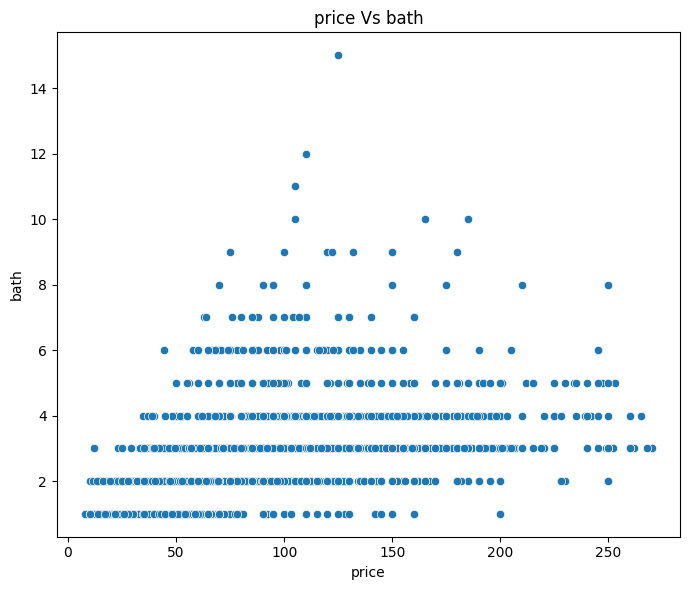





Figure 16: price Vs bhk



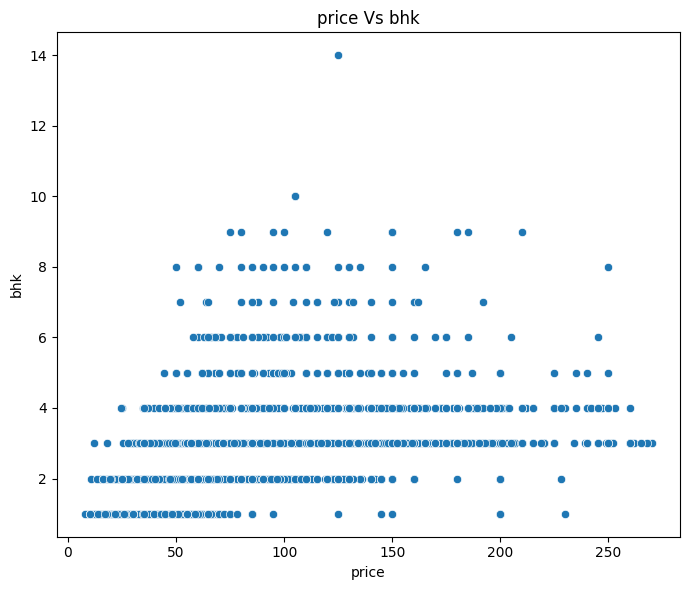





Figure 17: bhk Vs price_per_sqft



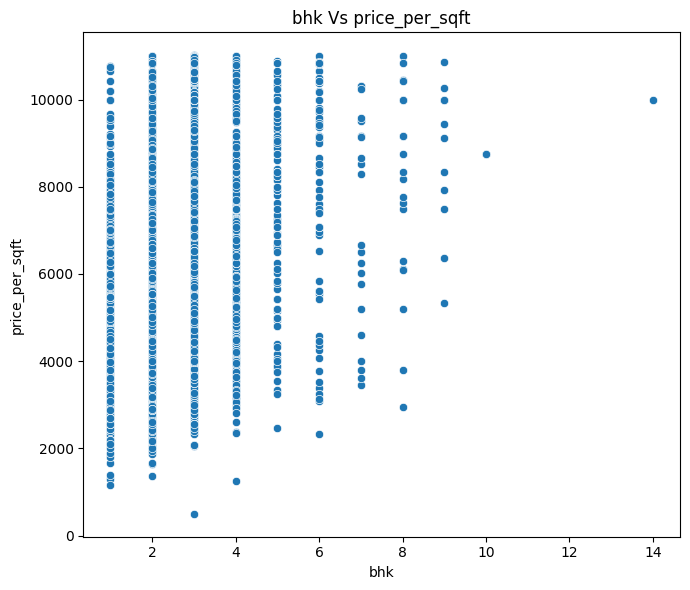





Figure 18: bhk Vs total_sqft



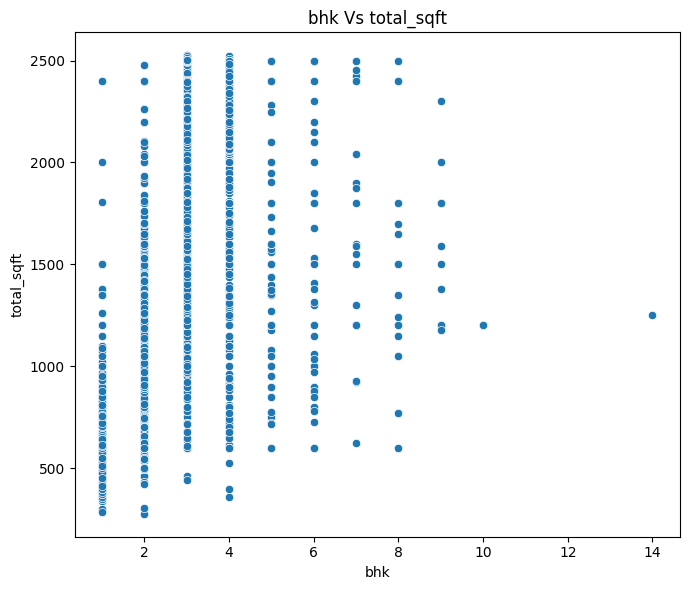





Figure 19: bhk Vs bath



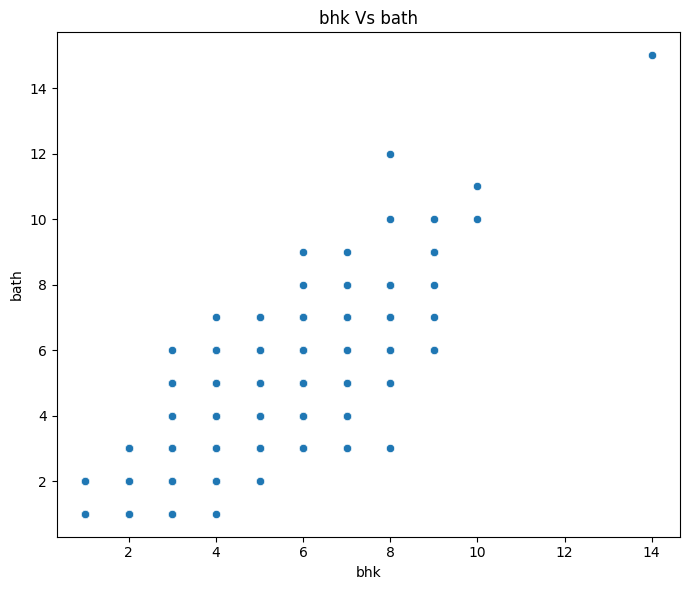





Figure 20: bhk Vs price



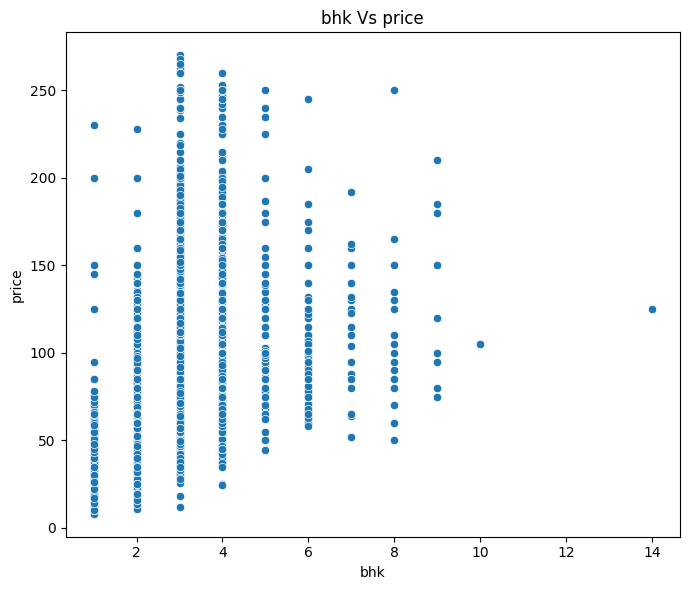

In [35]:
# generate all possible combinations of data frame columns and plot scatter plot
x = ['price_per_sqft', 'total_sqft', 'bath', 'price', 'bhk']
y = ['price_per_sqft', 'total_sqft', 'bath', 'price', 'bhk']
plot_drowns = 0
for i in x:
  for j in y:
    if i != j: # if i and j are not the same
      plot_drowns = plot_drowns + 1
      print(f'Figure {plot_drowns}: {i} Vs {j}\n')
      plt.figure(figsize=(7, 6)) # set figure size
      sns.scatterplot(x=i, y=j, data=IQR_trim_df) # plot scatter plot between i and j
      plt.title(f'{i} Vs {j}') # set title
      plt.tight_layout() # adjust layout
      plt.show() # show
      print('\n\n\n') # print 3 new lines

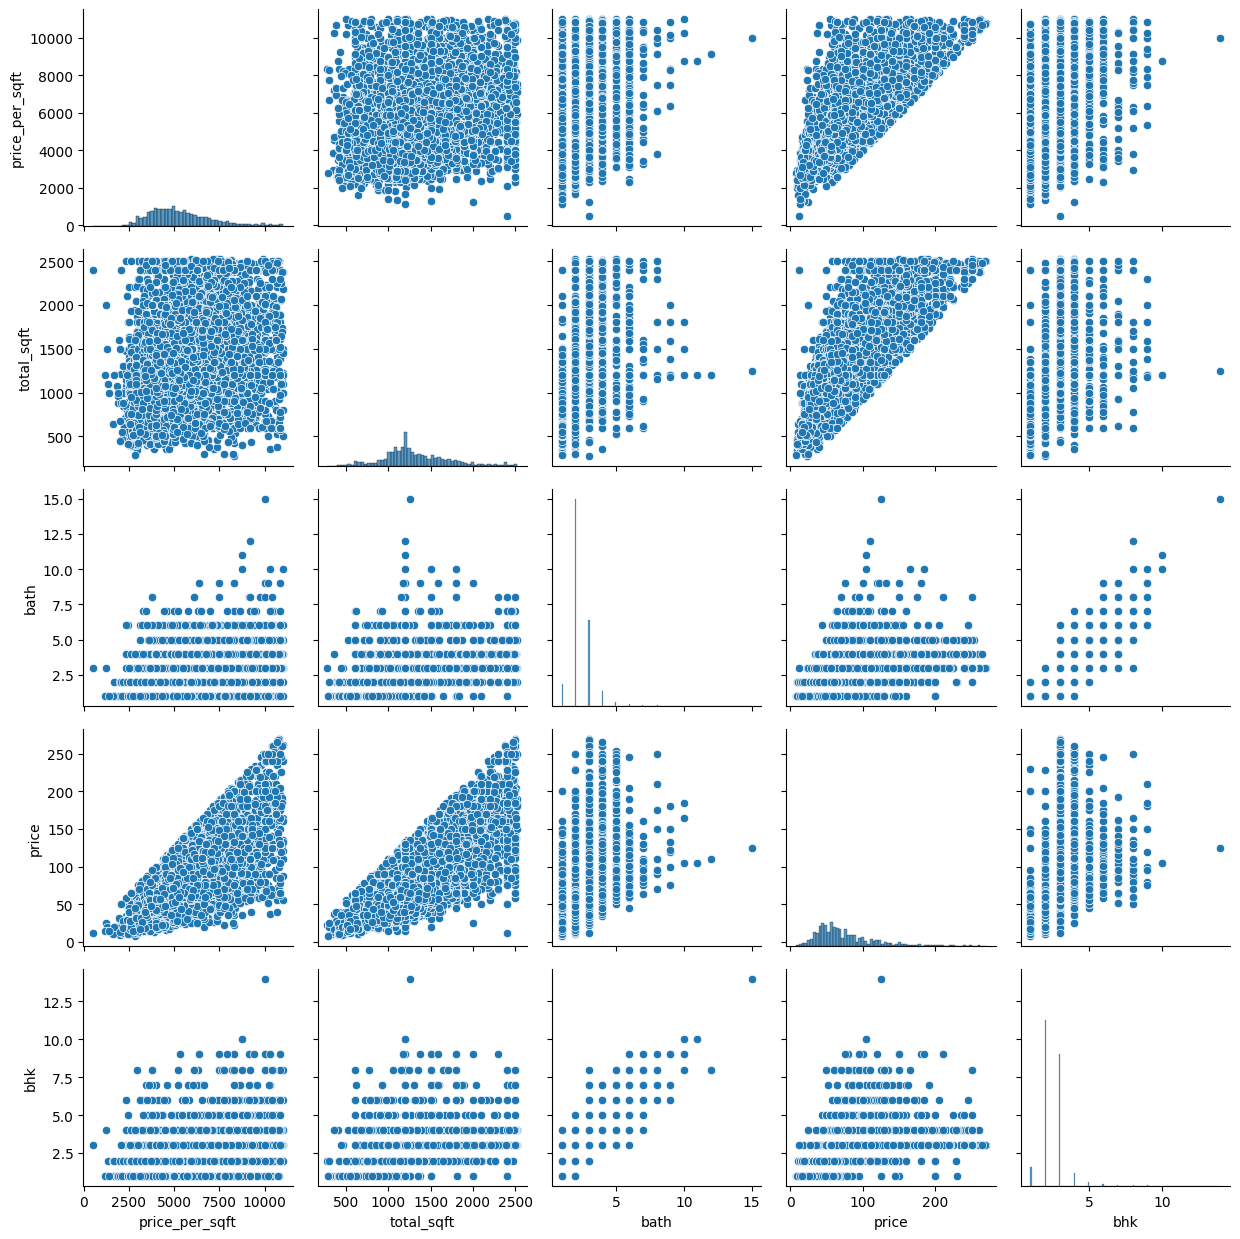

In [36]:
#plot all in one place
sns.pairplot(IQR_trim_df[['price_per_sqft', 'total_sqft', 'bath', 'price', 'bhk']]) # plot pair plot between price_per_sqft, total_sqft, bath, price, bhk
plt.tight_layout() # adjust layout
plt.show()